In [1]:
# import dependencies 
import pickle 
from tqdm.notebook import tqdm
import numpy as np
from allennlp.data.tokenizers.spacy_tokenizer import SpacyTokenizer
import plotnine
from plotnine import *
import nltk
import pandas as pd
import os 
from utils import *
from minimality import *
import spacy
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [2]:
random = load_pickle("Metrics\Minimality\imdb_500_random_adj_minimality.pickle")
grad = load_pickle("Metrics\Minimality\imdb_mice_adj_minimality.pickle")

In [4]:
print(np.mean(random1), np.mean(grad1))

12.427860696517413 12.161458333333334


In [5]:
len(random1), len(grad1)

(201, 192)

In [6]:
random = load_pickle("Edits\imdb\imdb_500_random_adj.pickle")
grad = load_pickle("C:\\Users\\acer\Documents\edits_from_aris\pickle_files\imdb_mice_adj.pickle")

In [7]:
len(random)

430

In [8]:
#indexes = [random.index(item1) for item1, item2 in zip(random, grad) if len(item1) > 2 and len(item2) > 2]
random1 = [score_minimality(random[i][0][0], random[i][1][0]) for i in range(len(random)) if len(random[i]) > 1]
grad1 = [score_minimality(grad[i][0][0], grad[i][1][0]) for i in range(len(grad)) if len(grad[i]) > 1]

In [9]:
len(random1)

201

In [10]:
count, count2 = 0, 0
for item1, item2 in zip(random1, grad1):
    if item1 > 10:
        count+=1
    if item2 > 10:
        count2+=1
print("                                 Random            Grad") 
print("Mean Minimality           |", np.mean(random1),  "|", np.mean(grad1))
print("Sentences with min@2>10  |", count, "\t\t    ", "|", count2)

                                 Random            Grad
Mean Minimality           | 12.427860696517413 | 12.161458333333334
Sentences with min@2>10  | 74 		     | 63


It seems that for all POS tag implementation gradient masking results in a bigger number of masked words. This can be attributed to noise created by the predictor's attention

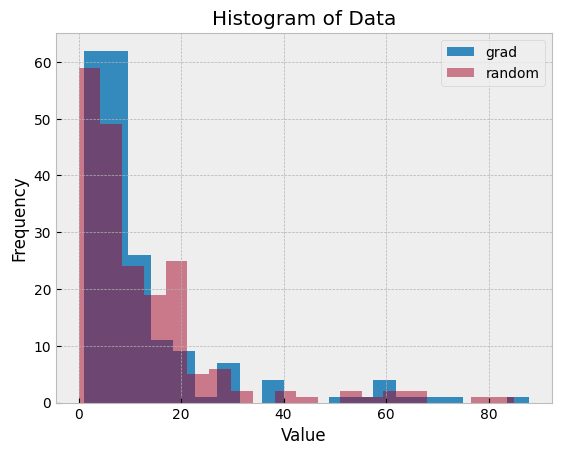

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Example data with potential outliers
data = grad1
data2 = random1

# Plot a histogram of the data
fig, ax = plt.subplots()
ax.hist(data, bins=20, label="grad")
ax.hist(data2,bins=20, label="random", alpha=0.5)

plt.legend()

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Data')

# Show the plot
plt.show()

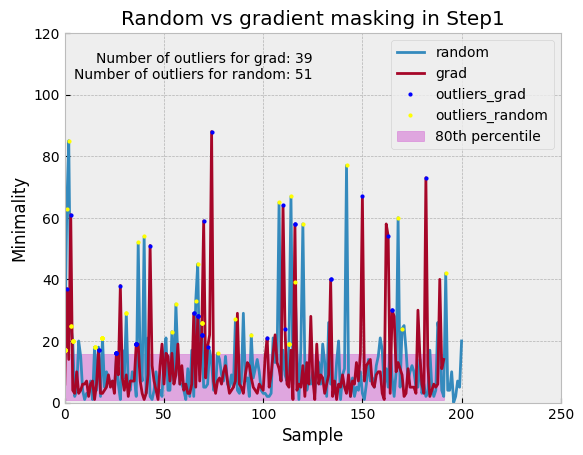

<Figure size 10000x5000 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

# Define the labels for the x-axis
x2_labels = range(len(random1))
x_labels = range(len(grad1))

lower_limit = np.percentile(grad1, 0)
upper_limit = np.percentile(grad1, 80)

# Create a figure and axis object
fig, ax = plt.subplots()
# Create the plot
ax.plot(x2_labels, random1, label="random")
ax.plot(x_labels, grad1, label="grad")

above_threshold = [item for item in grad1 if item > upper_limit]
x_threshold = [grad1.index(item) for item in grad1 if item > upper_limit]

above_threshold2 = [item for item in random1 if item > upper_limit]
x_threshold2 = [random1.index(item) for item in random1 if item > upper_limit]

ax.plot(x_threshold, above_threshold, 'o', markersize=2, markerfacecolor='blue', markeredgecolor='blue', label="outliers_grad")
ax.plot(x_threshold2, above_threshold2, 'o', markersize=2, markerfacecolor='yellow', markeredgecolor='yellow', label="outliers_random")

ax.set_ylim([0, 120])
ax.set_xlim([0, 250])
# Count the number of outliers
num_outliers = sum(grad1 > upper_limit)
num_outliers2 = sum(random1 > upper_limit)

# Add a text annotation to the plot
ax.text(0.5, 0.95, f'Number of outliers for grad: {num_outliers}\nNumber of outliers for random: {num_outliers2}', transform=ax.transAxes, ha='right', va='top')

# Shade the region where most of the data falls
ax.fill_between(x_labels, lower_limit, upper_limit, color='m', alpha=0.3, label='80th percentile')

plt.legend()
# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Minimality")
plt.title("Random vs gradient masking in Step1")

plt.figure(figsize= (100,50))

# Display the plot
plt.show()

In [16]:
random = load_pickle("C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_mice_random_adj.pkl")
grad = load_pickle("C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_mice_grad_adj_new.pkl")
randomnews1 = [score_minimality(random[i][0][0], random[i][1][0]) for i in range(len(random)) if len(random[i]) > 1]
gradnews1 = [score_minimality(grad[i][0][0], grad[i][1][0]) for i in range(len(grad)) if len(grad[i]) > 1]

In [17]:
count, count2 = 0, 0
for item1, item2 in zip(randomnews1, gradnews1):
    if item1 > 5:
        count+=1
    if item2 > 5:
        count2+=1
print("                                 Random            Grad") 
print("Mean Minimality           |", np.mean(randomnews1),  "|", np.mean(gradnews1))
print("Sentences with min@2>10   |", count, "\t\t    ", "|", count2)

                                 Random            Grad
Mean Minimality           | 3.002985074626866 | 3.2732558139534884
Sentences with min@2>10   | 50 		     | 61


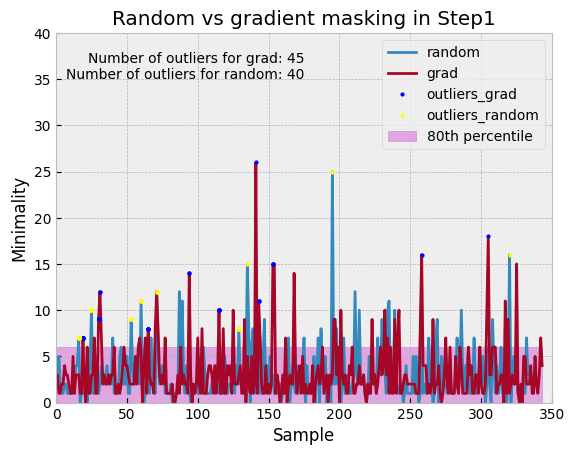

<Figure size 10000x5000 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

# Define the labels for the x-axis
x2_labels = range(len(randomnews1))
x_labels = range(len(gradnews1))

lower_limit = np.percentile(gradnews1, 0)
upper_limit = np.percentile(gradnews1, 85)

# Create a figure and axis object
fig, ax = plt.subplots()
# Create the plot
ax.plot(x2_labels, randomnews1, label="random")
ax.plot(x_labels, gradnews1, label="grad")

above_threshold = [item for item in gradnews1 if item > upper_limit]
x_threshold = [gradnews1.index(item) for item in gradnews1 if item > upper_limit]

above_threshold2 = [item for item in randomnews1 if item > upper_limit]
x_threshold2 = [randomnews1.index(item) for item in randomnews1 if item > upper_limit]

ax.plot(x_threshold, above_threshold, 'o', markersize=2, markerfacecolor='blue', markeredgecolor='blue', label="outliers_grad")
ax.plot(x_threshold2, above_threshold2, 'o', markersize=2, markerfacecolor='yellow', markeredgecolor='yellow', label="outliers_random")

ax.set_ylim([0, 40])
ax.set_xlim([0, 350])
# Count the number of outliers
num_outliers = sum(gradnews1 > upper_limit)
num_outliers2 = sum(randomnews1 > upper_limit)

# Add a text annotation to the plot
ax.text(0.5, 0.95, f'Number of outliers for grad: {num_outliers}\nNumber of outliers for random: {num_outliers2}', transform=ax.transAxes, ha='right', va='top')

# Shade the region where most of the data falls
ax.fill_between(x_labels, lower_limit, upper_limit, color='m', alpha=0.3, label='80th percentile')

plt.legend()
# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Minimality")
plt.title("Random vs gradient masking in Step1")

plt.figure(figsize= (100,50))

# Display the plot
plt.show()

## Inspecting mask frac and minimality for IMDb in step1

In [426]:
random_mask = pd.read_csv("C:\\Users\\acer\Documents\edits_from_aris\pos_adj_random_0\edits.csv", sep="\t")
grad_mask = pd.read_csv("C:\\Users\\acer\Documents\edits_from_aris\pos_adj_grad_0\edits.csv", sep="\t")

In [427]:
random_mask_frac = np.mean(random_mask.query('sorted_idx==0')["mask_frac"])
grad_mask_frac = np.mean(grad_mask.query('sorted_idx==0')["mask_frac"])

In [428]:
randomnews1 = list(random_mask.query('sorted_idx==0')["mask_frac"].dropna())
gradnews1 = list(grad_mask.query('sorted_idx==0')["mask_frac"].dropna())

In [429]:
len(randomnews1)

204

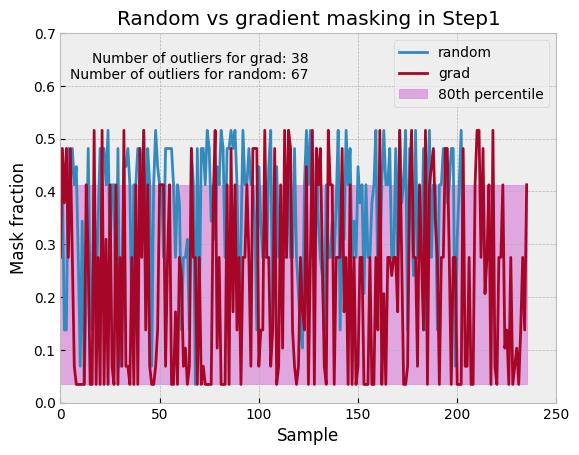

<Figure size 10000x5000 with 0 Axes>

In [430]:
import matplotlib.pyplot as plt

# Define the labels for the x-axis
x2_labels = range(len(randomnews1))
x_labels = range(len(gradnews1))

lower_limit = np.percentile(gradnews1, 0)
upper_limit = np.percentile(gradnews1, 80)

# Create a figure and axis object
fig, ax = plt.subplots()
# Create the plot
ax.plot(x2_labels, randomnews1, label="random")
ax.plot(x_labels, gradnews1, label="grad")

above_threshold = [item for item in gradnews1 if item > upper_limit]
x_threshold = [gradnews1.index(item) for item in gradnews1 if item > upper_limit]

above_threshold2 = [item for item in randomnews1 if item > upper_limit]
x_threshold2 = [randomnews1.index(item) for item in randomnews1 if item > upper_limit]

ax.set_ylim([0, 0.7])
ax.set_xlim([0, 250])
# Count the number of outliers
num_outliers = sum(gradnews1 > upper_limit)
num_outliers2 = sum(randomnews1 > upper_limit)

# Add a text annotation to the plot
ax.text(0.5, 0.95, f'Number of outliers for grad: {num_outliers}\nNumber of outliers for random: {num_outliers2}', transform=ax.transAxes, ha='right', va='top')

# Shade the region where most of the data falls
ax.fill_between(x_labels, lower_limit, upper_limit, color='m', alpha=0.3, label='80th percentile')

plt.legend()
# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Mask fraction")
plt.title("Random vs gradient masking in Step1")

plt.figure(figsize=(100,50))

# Display the plot
plt.show()

In [431]:
random_mask_frac, grad_mask_frac

(0.36093749999999997, 0.22431144067796613)

In [432]:
random_minim = np.mean(random_mask.query('sorted_idx==0')["minimality"])
grad_minim = np.mean(grad_mask.query('sorted_idx==0')["minimality"])

In [433]:
random_minim, grad_minim

(0.061643109999114785, 0.07646212659387468)

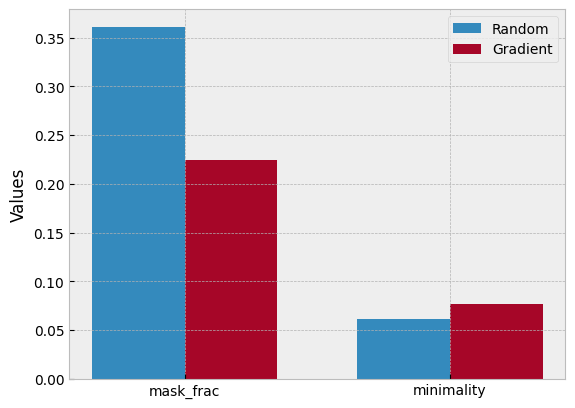

In [434]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
mask_frac = [0.1, 0.2]
minimality = [0.3, 0.5]
values_1 = [random_mask_frac, random_minim]
values_2 = [grad_mask_frac, grad_minim]

# Set up the figure and axis
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.35

# Plot the first set of bars
ax.bar(np.arange(len(mask_frac)), values_1, width=bar_width, label='Random')

# Plot the second set of bars
ax.bar(np.arange(len(minimality)) + bar_width, values_2, width=bar_width, label='Gradient')

# Set the x-axis labels and ticks
ax.set_xticks(np.arange(len(mask_frac)) + bar_width/2)
ax.set_xticklabels(['mask_frac', 'minimality'])

# Add legend and axis labels
ax.legend()
ax.set_ylabel('Values')

# Show the plot
plt.show()

## Imdb and Newsgroups datasets POS tag analysis

A semantic analysis in the two datasets. In both datasets there are more nouns than verbs than adjectives. 

In [2]:
newsgroups = load_pickle("C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_mice_grad_adj_new.pkl")
imdb = load_pickle("C:\\Users\\acer\Documents\edits_from_aris\pickle_files\imdb_mice_adj.pickle")

In [3]:
imdb_general_adj, imdb_general_nouns, imdb_general_verbs = [], [], []
news_general_adj, news_general_nouns, news_general_verbs = [], [], []
nlp = spacy.load("en_core_web_sm")
for item in imdb:
    text = item[0][0]
    doc = nlp(text)
    imdb_general_adj.append(len([word for word in doc if word.pos_=="ADJ"]))
    imdb_general_nouns.append(len([word for word in doc if word.pos_=="NOUN"]))
    imdb_general_verbs.append(len([word for word in doc if word.pos_=="VERB"]))
for item in newsgroups:
    text = item[0][0]
    doc = nlp(text)
    news_general_adj.append(len([word for word in doc if word.pos_=="ADJ"]))
    news_general_nouns.append(len([word for word in doc if word.pos_=="NOUN"]))
    news_general_verbs.append(len([word for word in doc if word.pos_=="VERB"]))

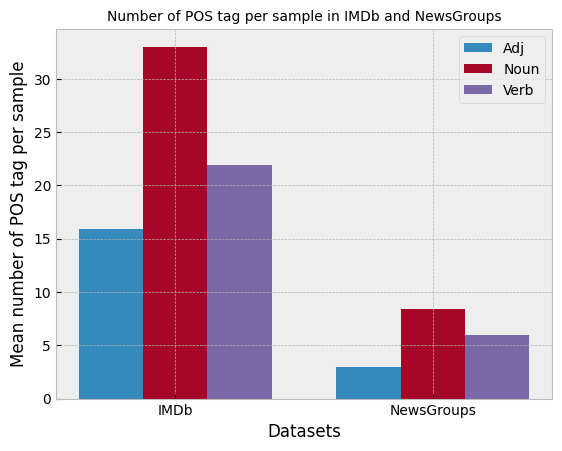

In [4]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 2
ind = np.arange(N) 
width = 0.25
  
xvals = [np.mean(imdb_general_adj), np.mean(news_general_adj)]
bar1 = plt.bar(ind, xvals, width)
  
yvals = [np.mean(imdb_general_nouns), np.mean(news_general_nouns)]
bar2 = plt.bar(ind+width, yvals, width)
  
zvals = [np.mean(imdb_general_verbs), np.mean(news_general_verbs)]
bar3 = plt.bar(ind+width*2, zvals, width)
  
plt.xlabel("Datasets")
plt.ylabel('Mean number of POS tag per sample')
plt.title("Number of POS tag per sample in IMDb and NewsGroups", fontsize=10)
  
plt.xticks(ind+width,['IMDb', 'NewsGroups'])
plt.legend( (bar1, bar2, bar3), ('Adj', 'Noun', 'Verb') )
plt.show()

### How many sentences have at least one adjective, noun or verb?

In [5]:
imdb_sentences_adj, imdb_sentences_noun, imdb_sentences_verb = 0, 0, 0
news_sentences_adj, news_sentences_noun, news_sentences_verb = 0, 0, 0
nlp = spacy.load("en_core_web_sm")
for item in imdb:
    text = item[0][0]
    doc = nlp(text)
    for word in doc:
        if word.pos_=="ADJ":
            imdb_sentences_adj+=1
            break
    for word in doc:
        if word.pos_=="NOUN":
            imdb_sentences_noun+=1
            break
    for word in doc:
        if word.pos_=="VERB":
            imdb_sentences_verb+=1
            break
for item in newsgroups:
    text = item[0][0]
    doc = nlp(text)
    for word in doc:
        if word.pos_=="ADJ":
            news_sentences_adj+=1
            break
    for word in doc:
        if word.pos_=="NOUN":
            news_sentences_noun+=1
            break
    for word in doc:
        if word.pos_=="VERB":
            news_sentences_verb+=1
            break

In [6]:
print(imdb_sentences_adj, imdb_sentences_noun, imdb_sentences_verb)
print(news_sentences_adj, news_sentences_noun, news_sentences_verb)

427 430 429
836 970 954


From the IMDb dataset almost all sentences contain at least one adjective, noun or verb. In the Newsgroups dataset, the number of sentences that contain at least one adjective is 836, meaning that 164 sentences do not contain any adjectives. For noun and verb the number of sentences is a lot higher which can give us an explanation for the higher flip rate in these experiments.

### POS tags flipped without targeting a POS tag

In [7]:
import difflib
#from spacy import SpacyTokenizer

#def html_highlight_diffs(orig, edited, tokenizer_wrapper=SpacyTokenizer()):
""" Given an orig and edited inputs, mark up differences in HTML. """

"""orig = orig.replace("<br ", "<-br ").replace(" .", ".")
edited = edited.replace("<br ", "<-br ").replace(" .", ".")

orig_tok = tokenizer_wrapper.tokenize(orig)
edited_tok = tokenizer_wrapper.tokenize(edited)

orig_text_tok = [t.text for t in orig_tok]
edited_text_tok = [t.text for t in edited_tok]

edited_mark_indices, num_add, num_del = get_marked_indices(orig_text_tok, 
                                                    edited_text_tok, "+")
orig_mark_indices, num_add_2, num_del_2 = get_marked_indices(orig_text_tok, 
                                                    edited_text_tok, "-")
print(edited_mark_indices,"\n",orig_mark_indices)
marked_original = orig 
for idx in reversed(orig_mark_indices):
    token = orig_tok[idx]
    start, end = token.idx, token.idx_end
    if start == None or end == None:
        logger.info(token, start, end)
    marked_original = marked_original[:start] + "<b>" + \
            marked_original[start:end] + "</b>" + marked_original[end:]

marked_edited = edited.replace("<br />", "<-br />") 
for idx in reversed(edited_mark_indices):
    token = edited_tok[idx]
    start, end = token.idx, token.idx_end
    if start == None or end == None:
        logger.info(token, start, end)
    marked_edited = marked_edited[:start] + "<b>" + \
            marked_edited[start:end] + "</b>" + marked_edited[end:]
return marked_original, marked_edited"""

def get_marked_indices(orig_tokinal, tokenized_contrast, symbol):
    """ Helper function for html_highlight_diffs. 
    Will only return indices of words deleted or replaced (not inserted). """

    index_offset = 0
    d = difflib.Differ()
    diff = d.compare(orig_tokinal, tokenized_contrast)
    list_diff = list(diff)
    tokens, modified_tokens, indices = [], [], []
    counter = 0
    additions, deletions = 0, 0

    for token_idx, token in enumerate(list_diff):
        marker = token[0]
        word = token[2:]
        if marker == symbol:        
            tokens.append(word)
            indices.append(counter)
            counter += 1
        elif marker == " ":
            modified_tokens.append(word)
            counter += 1

        if marker == "+":
            additions += 1
        if marker == "-":
            deletions += 1
            
    return indices, additions, deletions

In [8]:
newsgroups = load_pickle("C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_mice_gradient.pkl")
imdb = load_pickle("Edits\imdb\imdb_mice.pickle")
newsgroups_random = load_pickle("C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_mice_random.pkl")
imdb_random = load_pickle("Edits\imdb\imdb_500_random.pickle")

In [9]:
from tqdm import tqdm
nlp = spacy.load("en_core_web_sm")
tokenizer_wrapper = SpacyTokenizer()
imdb_adj, imdb_nouns, imdb_verbs = [], [], []
news_adj, news_nouns, news_verbs = [], [], []
imdb_adj_random, imdb_nouns_random, imdb_verbs_random = [], [], []
news_adj_random, news_nouns_random, news_verbs_random = [], [], []
d = {"newsgroups": [news_adj, news_nouns, news_verbs], "newsgroups_random": [news_adj_random, news_nouns_random, news_verbs_random], "imdb": [imdb_adj, imdb_nouns, imdb_verbs], "imdb_random": [imdb_adj_random, imdb_nouns_random, imdb_verbs_random]}
for task, task_name in zip([newsgroups, newsgroups_random, imdb, imdb_random], d.keys()):
    for item in task:
        if len(item) > 1:
            orig = item[0][0]
            edited = item[1][0]
            orig_tok = tokenizer_wrapper.tokenize(orig)
            edited_tok = tokenizer_wrapper.tokenize(edited)
            orig_text_tok = [t.text for t in orig_tok]
            edited_text_tok = [t.text for t in edited_tok]
            indexes = get_marked_indices(orig_text_tok, edited_text_tok, "-")[0]
            doc = nlp(orig)
            d[task_name][0].append(len([doc[i] for i in range(len(doc)) if i in indexes and doc[i].pos_=="ADJ"]))
            d[task_name][1].append(len([doc[i] for i in range(len(doc)) if i in indexes and doc[i].pos_=="NOUN"]))
            d[task_name][2].append(len([doc[i] for i in range(len(doc)) if i in indexes and doc[i].pos_=="VERB"]))


In [10]:
polyjuice = load_pickle("Edits\imdb\imdb_polyjuice.pickle")
textfooler = load_pickle("Edits\imdb\imdb_textfooler.pickle")
polyjuice_news = load_pickle("C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_polyjuice_random.pkl")
textfooler_news = load_pickle("C:\\Users\\acer\Documents\edits_from_aris\pickle_files\\newsgroups_textfooler_allennlp.pickle")

In [11]:
from tqdm import tqdm
nlp = spacy.load("en_core_web_sm")
tokenizer_wrapper = SpacyTokenizer()
polyjuice_adj, polyjuice_nouns, polyjuice_verbs = [], [], []
textfooler_adj, textfooler_nouns, textfooler_verbs = [], [], []
polyjuice_news_adj, polyjuice_news_nouns, polyjuice_news_verbs = [], [], []
textfooler_news_adj, textfooler_news_nouns, textfooler_news_verbs = [], [], []
d = {"polyjuice": [polyjuice_adj, polyjuice_nouns, polyjuice_verbs], "textfooler": [textfooler_adj, textfooler_nouns, textfooler_verbs], "polyjuice_news": [polyjuice_news_adj, polyjuice_news_nouns, polyjuice_news_verbs], "textfooler_news": [textfooler_news_adj, textfooler_news_nouns, textfooler_news_verbs]}
for task, task_name in tqdm(zip([polyjuice, textfooler, polyjuice_news, textfooler_news], d.keys())):
    for item in task:
        if len(item) > 1:
            orig = item[0][0]
            edited = item[1][0]
            orig_tok = tokenizer_wrapper.tokenize(orig)
            edited_tok = tokenizer_wrapper.tokenize(edited)
            orig_text_tok = [t.text for t in orig_tok]
            edited_text_tok = [t.text for t in edited_tok]
            indexes = get_marked_indices(orig_text_tok, edited_text_tok, "-")[0]
            doc = nlp(orig)
            d[task_name][0].append(len([doc[i] for i in range(len(doc)) if i in indexes and doc[i].pos_=="ADJ"]))
            d[task_name][1].append(len([doc[i] for i in range(len(doc)) if i in indexes and doc[i].pos_=="NOUN"]))
            d[task_name][2].append(len([doc[i] for i in range(len(doc)) if i in indexes and doc[i].pos_=="VERB"]))

4it [01:29, 22.28s/it]


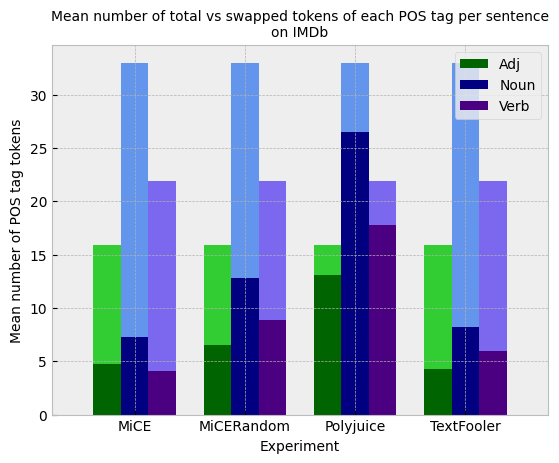

In [12]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 4
ind = np.arange(N) 
width = 0.25
  
xvals = [np.mean(imdb_adj), np.mean(imdb_adj_random), np.mean(polyjuice_adj), np.mean(textfooler_adj)]
bar1 = plt.bar(ind, xvals, width, color="darkgreen")
x2vals = [np.mean(imdb_general_adj)-np.mean(imdb_adj), np.mean(imdb_general_adj)-np.mean(imdb_adj_random), np.mean(imdb_general_adj)-np.mean(polyjuice_adj), np.mean(imdb_general_adj)-np.mean(textfooler_adj)]
bar12 = plt.bar(ind, x2vals, width, bottom=xvals, color="limegreen")
  
yvals = [np.mean(imdb_nouns), np.mean(imdb_nouns_random), np.mean(polyjuice_nouns), np.mean(textfooler_nouns)]
bar2 = plt.bar(ind+width, yvals, width,color="navy")
y2vals = [np.mean(imdb_general_nouns)-np.mean(imdb_nouns), np.mean(imdb_general_nouns)-np.mean(imdb_nouns_random), np.mean(imdb_general_nouns)-np.mean(polyjuice_nouns), np.mean(imdb_general_nouns)-np.mean(textfooler_nouns)]
bar22 = plt.bar(ind+width, y2vals, width, bottom=yvals, color="cornflowerblue")
  
zvals = [np.mean(imdb_verbs), np.mean(imdb_verbs_random), np.mean(polyjuice_verbs), np.mean(textfooler_verbs)]
bar3 = plt.bar(ind+width*2, zvals, width, color="indigo")
z2vals = [np.mean(imdb_general_verbs)-np.mean(imdb_verbs), np.mean(imdb_general_verbs)-np.mean(imdb_verbs_random), np.mean(imdb_general_verbs)-np.mean(polyjuice_verbs), np.mean(imdb_general_verbs)-np.mean(textfooler_verbs)]
bar32 = plt.bar(ind+width*2, z2vals, width, bottom=zvals,color="mediumslateblue")
  
plt.xlabel("Experiment", fontsize=10)
plt.ylabel('Mean number of POS tag tokens', fontsize=10)
plt.title("Mean number of total vs swapped tokens of each POS tag per sentence\non IMDb", fontsize=10)

plt.xticks(ind+width,['MiCE', 'MiCERandom', 'Polyjuice', 'TextFooler'])
plt.legend( (bar1, bar2, bar3), ('Adj', 'Noun', 'Verb') )
plt.xlim(-0.5, 4)
plt.show()

We see that the most prevalent POS tag is noun, followed by verb and adjective. This is what probably applies for most text datasets in the real world. We can notice a same distribution in the mean numbers of swapped tokens per POS tag. However, we must underline that in Polyjuice the number of swapped tokens is much higher than in the other three methods. This is probably due to the fact that Polyjuice uses GPT2 to generate text which has a threshold of 512 characters for input and also the fact that it uses random masking. 
As for MiCE with attention masking used, other than the noun POS tag which is the most prevalent, we notice a higher number for the adjective POS tag. This is probably due to the fact that adjectives are more important to the classifier's attention for the task of sentiment analysis rather than the verbs that usually carry more neutral information.
In general, we notice that the methods that use random masking (Polyjuice and MiCE with random masking) have a higher number of swapped tokens per POS tag and thus create less minimal counterfactuals.

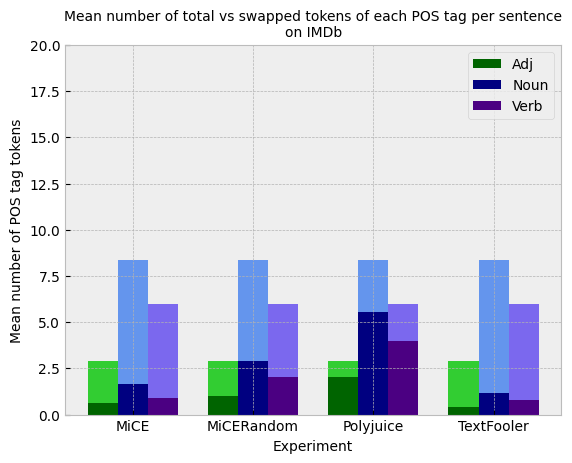

In [13]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 4
ind = np.arange(N) 
width = 0.25
  
xvals = [np.mean(news_adj), np.mean(news_adj_random), np.mean(polyjuice_news_adj), np.mean(textfooler_news_adj)]
bar1 = plt.bar(ind, xvals, width, color="darkgreen")
x2vals = [np.mean(news_general_adj)-np.mean(news_adj), np.mean(news_general_adj)-np.mean(news_adj_random), np.mean(news_general_adj)-np.mean(polyjuice_news_adj), np.mean(news_general_adj)-np.mean(textfooler_news_adj)]
bar12 = plt.bar(ind, x2vals, width, bottom=xvals, color="limegreen")
  
yvals = [np.mean(news_nouns), np.mean(news_nouns_random), np.mean(polyjuice_news_nouns), np.mean(textfooler_news_nouns)]
bar2 = plt.bar(ind+width, yvals, width,color="navy")
y2vals = [np.mean(news_general_nouns)-np.mean(news_nouns), np.mean(news_general_nouns)-np.mean(news_nouns_random), np.mean(news_general_nouns)-np.mean(polyjuice_news_nouns), np.mean(news_general_nouns)-np.mean(textfooler_news_nouns)]
bar22 = plt.bar(ind+width, y2vals, width, bottom=yvals, color="cornflowerblue")
  
zvals = [np.mean(news_verbs), np.mean(news_verbs_random), np.mean(polyjuice_news_verbs), np.mean(textfooler_news_verbs)]
bar3 = plt.bar(ind+width*2, zvals, width, color="indigo")
z2vals = [np.mean(news_general_verbs)-np.mean(news_verbs), np.mean(news_general_verbs)-np.mean(news_verbs_random), np.mean(news_general_verbs)-np.mean(polyjuice_news_verbs), np.mean(news_general_verbs)-np.mean(textfooler_news_verbs)]
bar32 = plt.bar(ind+width*2, z2vals, width, bottom=zvals,color="mediumslateblue")
  
plt.xlabel("Experiment", fontsize=10)
plt.ylabel('Mean number of POS tag tokens', fontsize=10)
plt.title("Mean number of total vs swapped tokens of each POS tag per sentence\non IMDb", fontsize=10)

plt.xticks(ind+width,['MiCE', 'MiCERandom', 'Polyjuice', 'TextFooler'])
plt.legend( (bar1, bar2, bar3), ('Adj', 'Noun', 'Verb') )
plt.ylim(0, 20)
plt.show()

## Flip Rates on POS tags

In [14]:
from tqdm import tqdm
import os, spacy
#nlp = spacy.load("en_core_web_sm")
folder_path = "C:\\Users\\acer\Downloads\Counterfactuals_of_Counterfactuals\Edits\imdb"
names = os.listdir(folder_path)
folder_path2 = "C:\\Users\\acer\Downloads\Counterfactuals_of_Counterfactuals\Edits\\newsgroups"
names2 = os.listdir(folder_path2)
folder_path3 = "C:\\Users\\acer\Documents\edits_from_aris\\pickle_files"
filenames = [folder_path+"\\"+item for item in names] + [folder_path2+"\\"+item2 for item2 in names2] + [folder_path3+"\\"+item3 for item3 in os.listdir(folder_path3)]
#filenames = [item for item in filenames for pos in ["adj", "noun", "verb", "ADJ", "NOUN", "VERB"] if pos in item]
for filename in filenames:
    pickle_file = filename
    print(filename.split("\\")[-1])
    edit_list = load_pickle(pickle_file)
    total = len(edit_list)
    new_list = []
    for i in range(1,10):
        flipped_count = 0
        for item in edit_list:
            if len(item) >= i+1:
                flipped_count+=1
            # a way to see which of the non-flipped sentences contain the targeted POS tag
            """if len(item) == i:
                doc = nlp(item[i-1][0])
                nouns = len([word for word in doc if word.pos_=="ADJ"])
                print(f"Adjectives: {nouns}")"""
        flip_rate = flipped_count / total
        new_list.append((f"Step {i}:", round(flip_rate,3)))
        #print(f"Flip rate at step {i}: {round(flip_rate*100,3)}%")
        total = flipped_count
    print(new_list)

imdb_500_adj.pickle
[('Step 1:', 0.528), ('Step 2:', 0.934), ('Step 3:', 0.962), ('Step 4:', 0.917), ('Step 5:', 0.947), ('Step 6:', 0.972), ('Step 7:', 0.936), ('Step 8:', 0.975), ('Step 9:', 0.962)]
imdb_500_noun.pickle
[('Step 1:', 0.537), ('Step 2:', 0.987), ('Step 3:', 0.987), ('Step 4:', 0.991), ('Step 5:', 0.987), ('Step 6:', 0.991), ('Step 7:', 0.995), ('Step 8:', 0.977), ('Step 9:', 0.981)]
imdb_500_random.pickle
[('Step 1:', 1.0), ('Step 2:', 1.0), ('Step 3:', 1.0), ('Step 4:', 1.0), ('Step 5:', 1.0), ('Step 6:', 1.0), ('Step 7:', 1.0), ('Step 8:', 1.0), ('Step 9:', 1.0)]
imdb_500_random_adj.pickle
[('Step 1:', 0.467), ('Step 2:', 0.96), ('Step 3:', 0.984), ('Step 4:', 0.979), ('Step 5:', 0.978), ('Step 6:', 0.978), ('Step 7:', 0.989), ('Step 8:', 0.977), ('Step 9:', 0.994)]
imdb_500_random_noun.pickle
[('Step 1:', 0.449), ('Step 2:', 0.995), ('Step 3:', 1.0), ('Step 4:', 0.995), ('Step 5:', 0.99), ('Step 6:', 0.989), ('Step 7:', 1.0), ('Step 8:', 1.0), ('Step 9:', 1.0)]
imdb

In [15]:
from tqdm import tqdm
folder_path = "C:\\Users\\acer\Downloads\Counterfactuals_of_Counterfactuals\Edits\imdb"
names = os.listdir(folder_path)
folder_path2 = "C:\\Users\\acer\Downloads\Counterfactuals_of_Counterfactuals\Edits\\newsgroups"
names2 = os.listdir(folder_path2)
folder_path3 = "C:\\Users\\acer\Documents\edits_from_aris\\pickle_files"
filenames = [folder_path+"\\"+item for item in names] + [folder_path2+"\\"+item2 for item2 in names2] + [folder_path3+"\\"+item3 for item3 in os.listdir(folder_path3)]
filenames = [item for item in filenames if "beam" not in item and "greedy" not in item and "sample" not in item]
#filenames = [item for item in filenames for pos in ["adj", "noun", "verb", "ADJ", "NOUN", "VERB"] if pos in item]
for filename in filenames:
    pickle_file = filename
    print(filename.split("\\")[-1])
    edit_list = load_pickle(pickle_file)
    total = len(edit_list)
    new_list = []
    for i in range(1,10):
        flipped_count = 0
        for item in edit_list:
            if len(item) > i+1:
                if "newsgroups" in filename:
                    if isinstance(item[i-1][1][0],str):
                        prev_str = item[i-1][1][0]
                        new_str = item[i][1][0]
                        if prev_str!=new_str:
                            flipped_count+=1
                    else:
                        prev_arr = np.array(item[i-1][1])
                        prev_max_idx = np.array(prev_arr).argmax()
                        new_arr = np.array(item[i][1])
                        new_max_idx = np.array(new_arr).argmax()
                        if new_max_idx!=prev_max_idx:
                            flipped_count+=1
                else:
                    prev_arr = np.array(item[i-1][1])
                    prev_max_idx = np.array(prev_arr).argmax()
                    new_arr = np.array(item[i][1])
                    new_max_idx = np.array(new_arr).argmax()
                    if new_max_idx!=prev_max_idx:
                        flipped_count+=1
                #for imdb
                #if round(item[i][1][0]) != round(item[i-1][1][0]):
                #    flipped_count+=1
        flip_rate = flipped_count / total
        new_list.append((f"Step {i}:", round(flip_rate,3)))
        #print(f"Flip rate at step {i}: {round(flip_rate*100,3)}%")
        total = flipped_count
    print(new_list)

imdb_500_adj.pickle
[('Step 1:', 0.488), ('Step 2:', 0.848), ('Step 3:', 0.854), ('Step 4:', 0.842), ('Step 5:', 0.891), ('Step 6:', 0.965), ('Step 7:', 0.873), ('Step 8:', 0.896), ('Step 9:', 0.837)]
imdb_500_noun.pickle
[('Step 1:', 0.526), ('Step 2:', 0.801), ('Step 3:', 0.895), ('Step 4:', 0.889), ('Step 5:', 1.007), ('Step 6:', 0.883), ('Step 7:', 0.953), ('Step 8:', 1.008), ('Step 9:', 0.87)]
imdb_500_random.pickle
[('Step 1:', 0.995), ('Step 2:', 0.846), ('Step 3:', 0.851), ('Step 4:', 0.945), ('Step 5:', 0.928), ('Step 6:', 1.026), ('Step 7:', 0.96), ('Step 8:', 0.959), ('Step 9:', 0.957)]
imdb_500_random_adj.pickle
[('Step 1:', 0.444), ('Step 2:', 0.832), ('Step 3:', 0.704), ('Step 4:', 0.938), ('Step 5:', 0.8), ('Step 6:', 0.869), ('Step 7:', 0.671), ('Step 8:', 0.735), ('Step 9:', 0.944)]
imdb_500_random_noun.pickle
[('Step 1:', 0.442), ('Step 2:', 0.663), ('Step 3:', 0.698), ('Step 4:', 0.818), ('Step 5:', 0.875), ('Step 6:', 0.921), ('Step 7:', 0.776), ('Step 8:', 1.067), 

### IMDb

Despite the fact that adjectives are the least frequent POS tag, they are the most likely to be flipped. This is proved in our flip rates in all three editors. This is probably due to the fact that adjectives are more likely to be used in a negative context or to give emphasis to something positive. Along with the fact that targeting adjectives results in more minimal edits than targeting other POS tags, this makes adjectives the most suitable POS tag to target for our task.

The least frequently flipped POS tag is the verb. This is probably due to the fact that verbs are more likely to be used in a neutral context.

However, the difference between the flip rates of the three POS tags is not that big. This means that the POS tag is not the only factor that determines the flip rate. The context of the word is also important.

In [41]:
imdb_mice = [1.0, 0.8422, 0.891, 0.877, 0.8677, 0.8445, 0.8724, 0.8654, 0.8561]
imdb_polyjuice = [0.8747, 0.9107, 0.9392, 0.949, 0.9592, 0.9617, 0.9515, 0.9719, 0.9668]
imdb_textfooler = [0.6241, 0.6984, 0.7193, 0.7309, 0.7517, 0.7633, 0.7703, 0.7796, 0.7865]
imdb_mice_random = [0.9953, 0.8419, 0.7163, 0.6767, 0.6279, 0.6442, 0.6186, 0.593, 0.5674]

In [42]:
imdb_flip = [(f'Step 1:', val) for val in imdb_mice]
imdb_random_flip = [(f'Step 1:', val) for val in imdb_mice_random]
imdb_polyjuice_flip = [(f'Step 1:', val) for val in imdb_polyjuice]
imdb_textfooler_flip = [(f'Step 1:', val) for val in imdb_textfooler]

In [43]:
flip_adj = [('Step 1:', 0.447), ('Step 2:', 0.906), ('Step 3:', 0.948), ('Step 4:', 0.921), ('Step 5:', 0.947), ('Step 6:', 0.931), ('Step 7:', 0.933), ('Step 8:', 0.888), ('Step 9:', 0.964)]
flip_noun = [('Step 1:', 0.405), ('Step 2:', 0.977), ('Step 3:', 0.988), ('Step 4:', 0.976), ('Step 5:', 0.994), ('Step 6:', 0.988), ('Step 7:', 0.981), ('Step 8:', 0.994), ('Step 9:', 0.975)]
flip_verb = [('Step 1:', 0.398), ('Step 2:', 0.959), ('Step 3:', 0.976), ('Step 4:', 0.963), ('Step 5:', 0.981), ('Step 6:', 0.96), ('Step 7:', 0.966), ('Step 8:', 0.957), ('Step 9:', 0.993)]

In [44]:
imdb_random_adj = [('Step 1:', 0.467), ('Step 2:', 0.96), ('Step 3:', 0.984), ('Step 4:', 0.979), ('Step 5:', 0.978), ('Step 6:', 0.978), ('Step 7:', 0.989), ('Step 8:', 0.977), ('Step 9:', 0.994)]
imdb_random_noun = [('Step 1:', 0.449), ('Step 2:', 0.995), ('Step 3:', 1.0), ('Step 4:', 0.995), ('Step 5:', 0.99), ('Step 6:', 0.989), ('Step 7:', 1.0), ('Step 8:', 1.0), ('Step 9:', 1.0)]
imdb_random_verb = [('Step 1:', 0.407), ('Step 2:', 0.983), ('Step 3:', 1.0), ('Step 4:', 0.983), ('Step 5:', 0.994), ('Step 6:', 0.988), ('Step 7:', 0.982), ('Step 8:', 0.982), ('Step 9:', 0.994)]

In [45]:
imdb_polyjuice_random_adj = [('Step 1:', 0.756), ('Step 2:', 0.942), ('Step 3:', 0.954), ('Step 4:', 0.949), ('Step 5:', 0.964), ('Step 6:', 0.966), ('Step 7:', 0.961), ('Step 8:', 0.984), ('Step 9:', 0.98)]
imdb_polyjuice_random_noun = [('Step 1:', 0.693), ('Step 2:', 0.923), ('Step 3:', 0.927), ('Step 4:', 0.941), ('Step 5:', 0.946), ('Step 6:', 0.965), ('Step 7:', 0.95), ('Step 8:', 0.962), ('Step 9:', 0.965)]
imdb_polyjuice_random_verb = [('Step 1:', 0.723), ('Step 2:', 0.897), ('Step 3:', 0.943), ('Step 4:', 0.951), ('Step 5:', 0.964), ('Step 6:', 0.963), ('Step 7:', 0.987), ('Step 8:', 0.961), ('Step 9:', 0.973)]

In [46]:
imdb_textfooler_ADJ = [('Step 1:', 0.258), ('Step 2:', 1.0), ('Step 3:', 0.973), ('Step 4:', 1.0), ('Step 5:', 1.0), ('Step 6:', 1.0), ('Step 7:', 1.0), ('Step 8:', 1.0), ('Step 9:', 1.0)]
imdb_textfooler_NOUN = [('Step 1:', 0.223), ('Step 2:', 1.0), ('Step 3:', 1.0), ('Step 4:', 1.0), ('Step 5:', 1.0), ('Step 6:', 1.0), ('Step 7:', 1.0), ('Step 8:', 1.0), ('Step 9:', 1.0)]
imdb_textfooler_VERB = [('Step 1:', 0.24), ('Step 2:', 1.0), ('Step 3:', 0.981), ('Step 4:', 1.0), ('Step 5:', 0.99), ('Step 6:', 1.0), ('Step 7:', 0.99), ('Step 8:', 1.0), ('Step 9:', 0.99)]

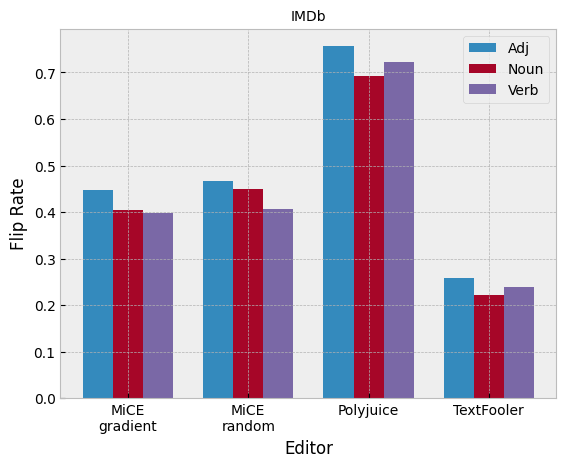

In [47]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 4
ind = np.arange(N) 
width = 0.25
  
xvals = [item[1] for item in flip_adj][:1] + [imdb_random_adj[:1][0][1]] + [imdb_polyjuice_random_adj[:1][0][1]] + [imdb_textfooler_ADJ[:1][0][1]]
bar1 = plt.bar(ind, xvals, width)
  
yvals = [item[1] for item in flip_noun][:1] + [imdb_random_noun[:1][0][1]] + [imdb_polyjuice_random_noun[:1][0][1]] + [imdb_textfooler_NOUN[:1][0][1]]
bar2 = plt.bar(ind+width, yvals, width)
  
zvals = [item[1] for item in flip_verb][:1] + [imdb_random_verb[:1][0][1]] + [imdb_polyjuice_random_verb[:1][0][1]] + [imdb_textfooler_VERB[:1][0][1]]
bar3 = plt.bar(ind+width*2, zvals, width)
  
plt.xlabel("Editor")
plt.ylabel('Flip Rate')
plt.title("IMDb", fontsize=10)

plt.xticks(ind+width,['MiCE\ngradient', 'MiCE\nrandom', 'Polyjuice', "TextFooler"])
plt.legend( (bar1, bar2, bar3), ('Adj', 'Noun', 'Verb') )
plt.show()

##### Flip Rates Trend 

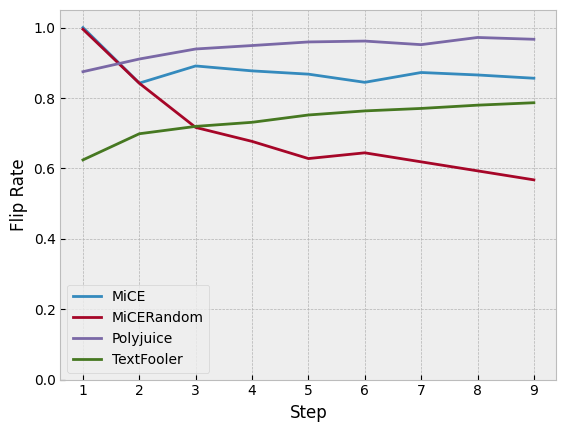

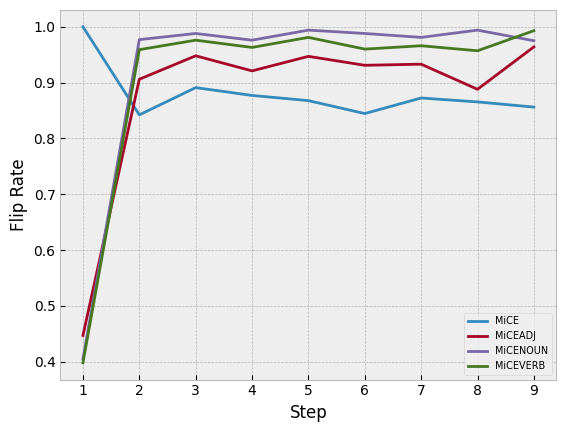

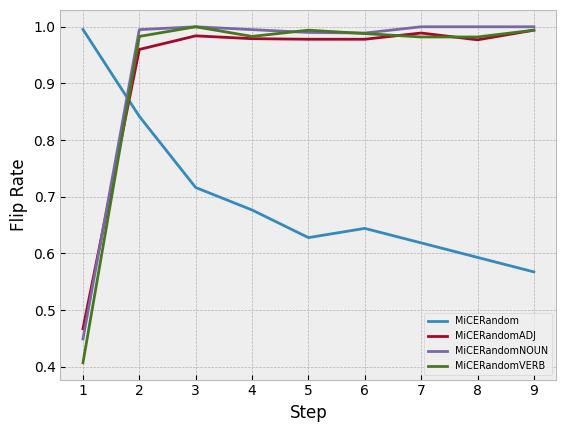

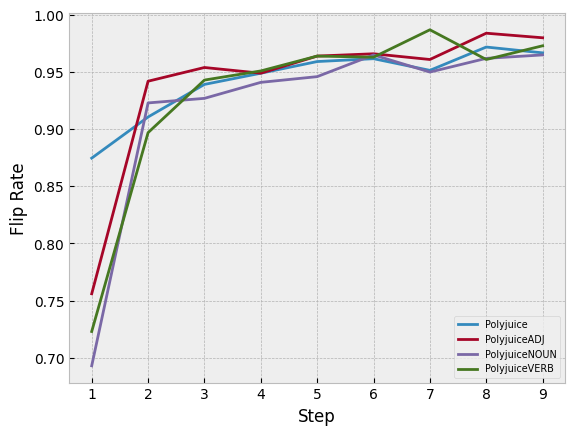

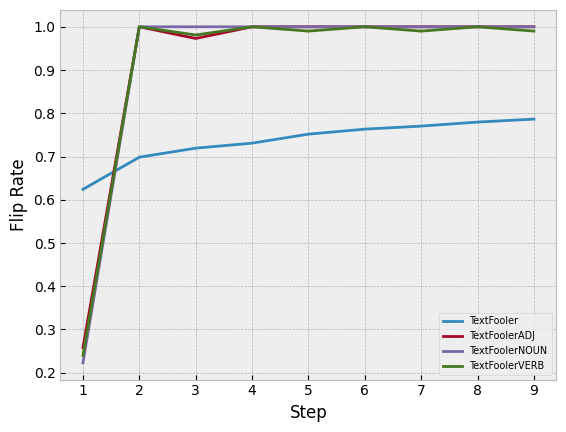

In [23]:
import matplotlib.pyplot as plt

# Example data for all imdb lines
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
lists = [(imdb_flip, "MiCE"), (imdb_random_flip, "MiCERandom"), (imdb_polyjuice_flip, "Polyjuice"), (imdb_textfooler_flip, "TextFooler"), (flip_adj, "MiCEADJ"), (flip_noun, "MiCENOUN"), (flip_verb, "MiCEVERB"), (imdb_random_adj, "MiCERandomADJ"), (imdb_random_noun, "MiCERandomNOUN"), (imdb_random_verb, "MiCERandomVERB"), (imdb_polyjuice_random_adj, "PolyjuiceADJ"), (imdb_polyjuice_random_noun, "PolyjuiceNOUN"), (imdb_polyjuice_random_verb, "PolyjuiceVERB"), (imdb_textfooler_ADJ, "TextFoolerADJ"), (imdb_textfooler_NOUN, "TextFoolerNOUN"), (imdb_textfooler_VERB, "TextFoolerVERB")]

for sublist in lists[:4]:
        new_list = [item[1] for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

plt.ylim(0,1.05)
# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.legend(fontsize='medium')

# Displaying the plot
plt.show()

for sublist in lists:
    if "MiCE" in sublist[1] and "MiCERandom" not in sublist[1]:
        new_list = [item[1] for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.legend(fontsize='x-small')

# Displaying the plot
plt.show()



for sublist in lists:
    if "MiCERandom" in sublist[1]:
        new_list = [item[1] for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.legend(fontsize='x-small')

# Displaying the plot
plt.show()

for sublist in lists:
    if "Polyjuice" in sublist[1]:
        new_list = [item[1] for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.legend(fontsize='x-small')

# Displaying the plot
plt.show()

for sublist in lists:
    if "TextFooler" in sublist[1]:
        new_list = [item[1] for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.legend(fontsize='x-small')

# Displaying the plot
plt.show()

### NewsGroups

In [24]:
news_mice = [0.89, 0.9188, 0.8806, 0.8775, 0.8574, 0.8614, 0.8524, 0.8534, 0.8322]
news_polyjuice = [0.726, 0.9131, 0.9074, 0.8912, 0.9237, 0.8595, 0.9135, 0.9263, 0.9659]
news_textfooler = [0.941, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
news_mice_random = [0.79, 0.715, 0.6395, 0.6224, 0.5972, 0.567, 0.5565, 0.5484, 0.5444]

In [48]:
newsgroups_mice = [(f'Step 1:', val) for val in news_mice]
newsgroups_random_mice = [(f'Step 1:', val) for val in news_mice_random]
newsgroups_polyjuice = [(f'Step 1:', val) for val in news_polyjuice]
newsgroups_textfooler = [(f'Step 1:', val) for val in news_textfooler]
newsgroups_mice_gradient_adj = [('Step 1:', 0.344), ('Step 2:', 0.663), ('Step 3:', 0.785), ('Step 4:', 0.905), ('Step 5:', 0.889), ('Step 6:', 0.958), ('Step 7:', 0.964), ('Step 8:', 0.97), ('Step 9:', 0.969)]
newsgroups_mice_gradient_noun = [('Step 1:', 0.685), ('Step 2:', 0.863), ('Step 3:', 0.888), ('Step 4:', 0.914), ('Step 5:', 0.923), ('Step 6:', 0.946), ('Step 7:', 0.947), ('Step 8:', 0.945), ('Step 9:', 0.96)]
newsgroups_mice_gradient_verb = [('Step 1:', 0.454), ('Step 2:', 0.855), ('Step 3:', 0.923), ('Step 4:', 0.933), ('Step 5:', 0.937), ('Step 6:', 0.952), ('Step 7:', 0.963), ('Step 8:', 0.972), ('Step 9:', 0.961)]
newsgroups_mice_random_adj = [('Step 1:', 0.335), ('Step 2:', 0.737), ('Step 3:', 0.838), ('Step 4:', 0.913), ('Step 5:', 0.926), ('Step 6:', 0.971), ('Step 7:', 0.924), ('Step 8:', 0.975), ('Step 9:', 0.987)]
newsgroups_mice_random_noun = [('Step 1:', 0.666), ('Step 2:', 0.934), ('Step 3:', 0.952), ('Step 4:', 0.976), ('Step 5:', 0.984), ('Step 6:', 0.986), ('Step 7:', 0.965), ('Step 8:', 0.978), ('Step 9:', 0.99)]
newsgroups_mice_random_verb = [('Step 1:', 0.445), ('Step 2:', 0.885), ('Step 3:', 0.939), ('Step 4:', 0.989), ('Step 5:', 0.984), ('Step 6:', 0.989), ('Step 7:', 0.975), ('Step 8:', 0.974), ('Step 9:', 0.985)]
newsgroups_polyjuice_adj = [('Step 1:', 0.492), ('Step 2:', 0.638), ('Step 3:', 0.774), ('Step 4:', 0.794), ('Step 5:', 0.803), ('Step 6:', 0.877), ('Step 7:', 0.919), ('Step 8:', 0.936), ('Step 9:', 0.88)]
newsgroups_polyjuice_noun = [('Step 1:', 0.524), ('Step 2:', 0.647), ('Step 3:', 0.823), ('Step 4:', 0.914), ('Step 5:', 0.875), ('Step 6:', 0.906), ('Step 7:', 0.936), ('Step 8:', 0.952), ('Step 9:', 0.917)]
newsgroups_polyjuice_verb = [('Step 1:', 0.472), ('Step 2:', 0.614), ('Step 3:', 0.803), ('Step 4:', 0.906), ('Step 5:', 0.872), ('Step 6:', 0.902), ('Step 7:', 0.922), ('Step 8:', 0.961), ('Step 9:', 0.952)]
newsgroups_textfooler_ADJ = [('Step 1:', 0.186), ('Step 2:', 0.86), ('Step 3:', 0.956), ('Step 4:', 0.98), ('Step 5:', 0.98), ('Step 6:', 1.0), ('Step 7:', 0.986), ('Step 8:', 1.0), ('Step 9:', 0.986)]
newsgroups_textfooler_NOUN = [('Step 1:', 0.577), ('Step 2:', 0.988), ('Step 3:', 0.981), ('Step 4:', 0.996), ('Step 5:', 0.989), ('Step 6:', 0.998), ('Step 7:', 0.993), ('Step 8:', 1.0), ('Step 9:', 0.995)]
newsgroups_textfooler_VERB = [('Step 1:', 0.376), ('Step 2:', 0.96), ('Step 3:', 0.958), ('Step 4:', 0.983), ('Step 5:', 0.974), ('Step 6:', 0.997), ('Step 7:', 0.988), ('Step 8:', 1.0), ('Step 9:', 1.0)]

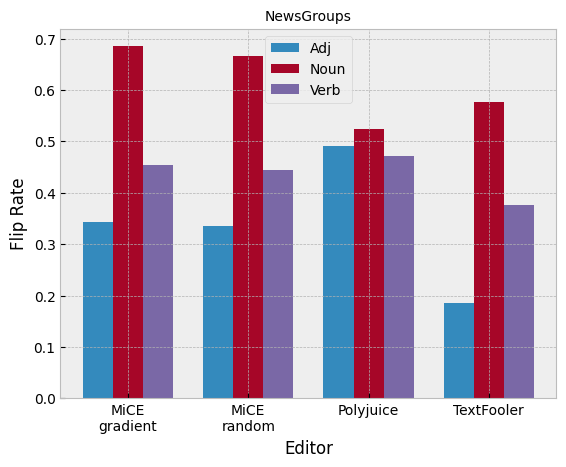

In [49]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
ind = np.arange(N)
width = 0.25

xvals = [item[1] for item in newsgroups_mice_gradient_adj][:1] + [newsgroups_mice_random_adj[:1][0][1]] + [newsgroups_polyjuice_adj[:1][0][1]] + [newsgroups_textfooler_ADJ[:1][0][1]]
bar1 = plt.bar(ind, xvals, width)
  
yvals = [item[1] for item in newsgroups_mice_gradient_noun][:1] + [newsgroups_mice_random_noun[:1][0][1]] + [newsgroups_polyjuice_noun[:1][0][1]] + [newsgroups_textfooler_NOUN[:1][0][1]]
bar2 = plt.bar(ind+width, yvals, width)
  
zvals = [item[1] for item in newsgroups_mice_gradient_verb][:1] + [newsgroups_mice_random_verb[:1][0][1]] + [newsgroups_polyjuice_verb[:1][0][1]] + [newsgroups_textfooler_VERB[:1][0][1]]
bar3 = plt.bar(ind+width*2, zvals, width)

plt.xlabel('Editor')
plt.ylabel('Flip Rate')
plt.title("NewsGroups", fontsize=10)
  
plt.xticks(ind+width,['MiCE\ngradient', 'MiCE\nrandom', 'Polyjuice', "TextFooler"])
plt.legend( (bar1, bar2, bar3), ('Adj', 'Noun', 'Verb') )
plt.show()

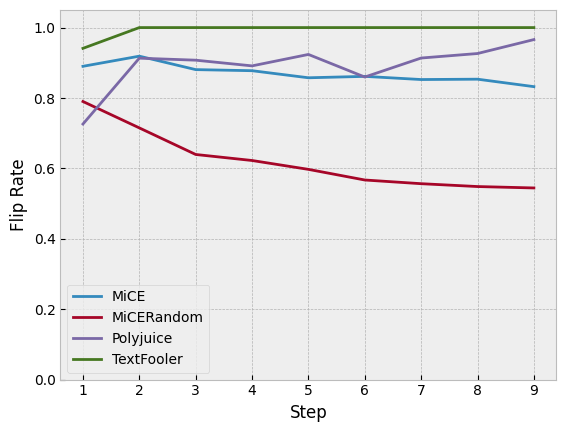

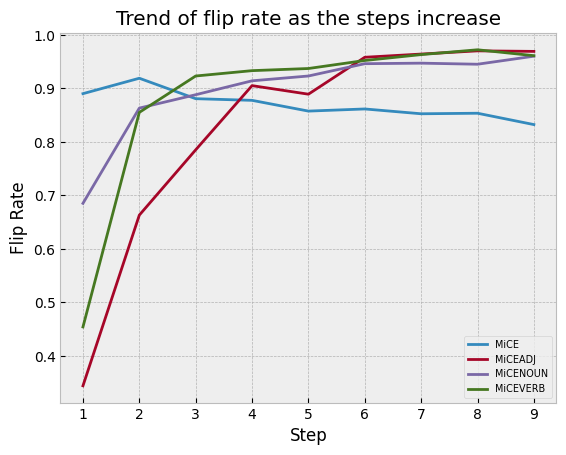

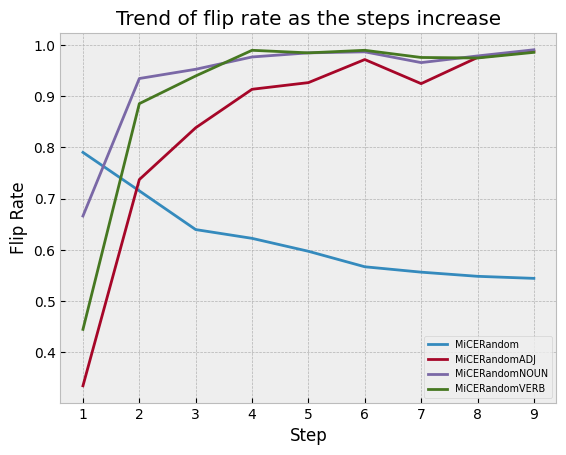

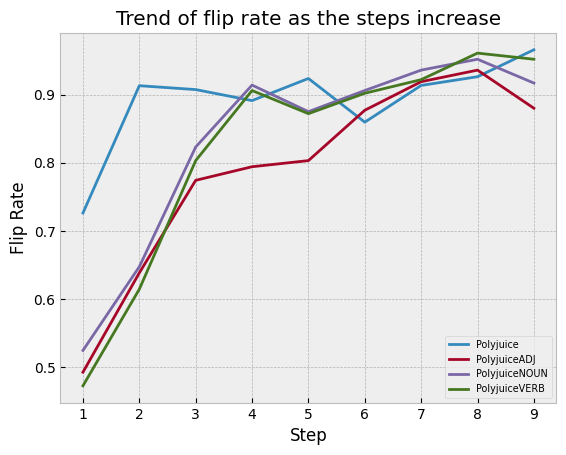

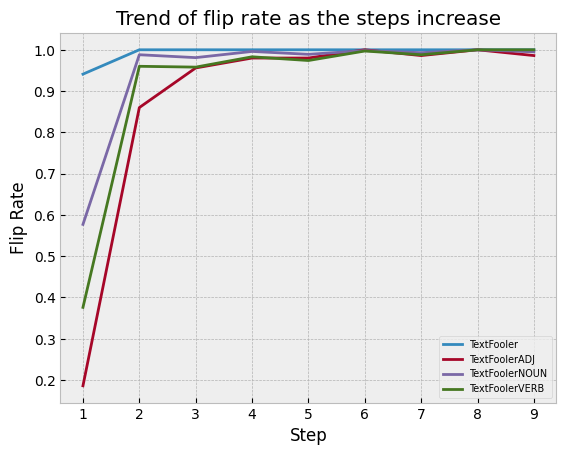

In [50]:
import matplotlib.pyplot as plt

# Example data for all imdb lines
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
lists = [(newsgroups_mice, "MiCE"), (newsgroups_random_mice, "MiCERandom"),(newsgroups_polyjuice, "Polyjuice"), (newsgroups_textfooler, "TextFooler"), (newsgroups_mice_gradient_adj, "MiCEADJ"), (newsgroups_mice_gradient_noun, "MiCENOUN"), (newsgroups_mice_gradient_verb, "MiCEVERB"), (newsgroups_mice_random_adj, "MiCERandomADJ"), (newsgroups_mice_random_noun, "MiCERandomNOUN"), (newsgroups_mice_random_verb, "MiCERandomVERB"), (newsgroups_polyjuice_adj, "PolyjuiceADJ"), (newsgroups_polyjuice_noun, "PolyjuiceNOUN"), (newsgroups_polyjuice_verb, "PolyjuiceVERB"), (newsgroups_textfooler_ADJ, "TextFoolerADJ"), (newsgroups_textfooler_NOUN, "TextFoolerNOUN"), (newsgroups_textfooler_VERB, "TextFoolerVERB")]

for sublist in lists[:4]:
        new_list = [item[1] for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

plt.ylim(0,1.05)
# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.legend(fontsize='medium')

# Displaying the plot
plt.show()

for sublist in lists:
    if "MiCE" in sublist[1] and "MiCERandom" not in sublist[1]:
        new_list = [item[1] for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.title('Trend of flip rate as the steps increase')
plt.legend(fontsize='x-small')

# Displaying the plot
plt.show()

for sublist in lists:
    if "MiCERandom" in sublist[1]:
        new_list = [item[1] for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.title('Trend of flip rate as the steps increase')
plt.legend(fontsize='x-small')

# Displaying the plot
plt.show()

for sublist in lists:
    if "Polyjuice" in sublist[1]:
        new_list = [item[1] for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.title('Trend of flip rate as the steps increase')
plt.legend(fontsize='x-small')

# Displaying the plot
plt.show()

for sublist in lists:
    if "TextFooler" in sublist[1]:
        new_list = [item[1] for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.title('Trend of flip rate as the steps increase')
plt.legend(fontsize='x-small')

# Displaying the plot
plt.show()

In NewsGroups dataset, where we generate counterfactual edits based on the topic classification task, the flip rates are different. Nouns produce the highest flip rates, followed by adjectives and verbs. This is probably due to the fact that the topic classification task is more related to the nouns of the sentence since that is where the key information is depicted for each topic.

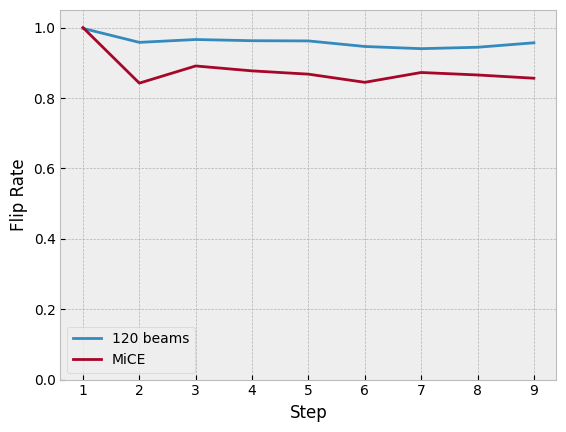

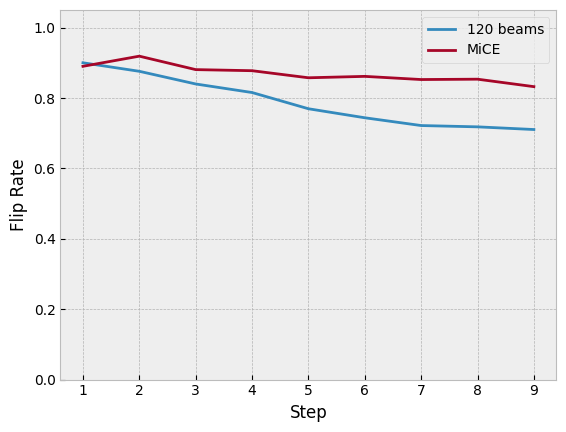

In [28]:
import matplotlib.pyplot as plt

# Example data for all imdb lines
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
imdb_mice_beam120_new = [0.9977, 0.958, 0.9661, 0.9627, 0.9621, 0.9463, 0.9401, 0.9441, 0.9568]
imdb_mice_greedy = [0.9977, 1.0, 0.9977, 0.9112, 0.9182, 0.9182, 1.0, 0.9977, 0.8735]
imdb_mice_beam5 = [0.8907, 0.9186, 0.8535, 0.893, 0.8651, 0.8721, 0.8698, 0.8488, 0.8465]
imdb_mice_beam15 = [0.8767, 0.893, 0.8605, 0.8581, 0.8163, 0.8116, 0.8163, 0.8233, 0.807]
imdb_mice_beam30 = [0.8628, 0.8698, 0.8419, 0.8628, 1.0, 0.9977, 0.8228, 0.8252, 0.7972]
imdb_mice_beam60 = [0.8605, 0.8837, 0.986, 1.0, 0.9953, 0.7976, 0.8238, 1.0, 0.7786]
newsgroups_mice_beam120 = [0.9, 0.8758, 0.8398, 0.8155, 0.7694, 0.7438, 0.7217, 0.718, 0.7104]
newsgroups_mice_beam15 = [0.881, 0.8655, 0.8443, 0.8025, 0.7828, 0.7489, 0.7238, 0.7073, 0.6876]
newsgroups_mice_beam30 = [0.882, 0.8927, 0.8499, 0.8328, 0.7891, 0.7674, 0.7366, 0.7188, 0.6875]
newsgroups_mice_greedy = [0.865, 0.896, 0.8595, 0.8511, 0.8341, 0.8454, 0.8272, 0.7916, 0.7894]
newsgroups_mice_beam5 = [0.887, 0.8811, 0.8549, 0.834, 0.8143, 0.7996, 0.7601, 0.7503, 0.7368]
newsgroups_mice_beam60 = [0.891, 0.8637, 0.8492, 0.8304, 0.7936, 0.7648, 0.7316, 0.7159, 0.701]
imdb_mice = [1.0, 0.8422, 0.891, 0.877, 0.8677, 0.8445, 0.8724, 0.8654, 0.8561]
news_mice = [0.89, 0.9188, 0.8806, 0.8775, 0.8574, 0.8614, 0.8524, 0.8534, 0.8322]

lists = [(imdb_mice_beam120_new, "120 beams"), (imdb_mice_greedy, "Greedy"), (imdb_mice_beam5, "5 beams"), (imdb_mice_beam15, "15 beams"), (imdb_mice_beam30, "30 beams"), (imdb_mice_beam60, "60 beams"), (imdb_mice, "MiCE")]
lists_news = [(newsgroups_mice_beam120, "120 beams"), (newsgroups_mice_beam15, "15 beams"), (newsgroups_mice_beam30, "30 beams"), (newsgroups_mice_greedy, "Greedy"), (newsgroups_mice_beam5, "5 beams"), (newsgroups_mice_beam60, "60 beams"), (news_mice, "MiCE")]

for sublist in [(imdb_mice_beam120_new, "120 beams"), (imdb_mice, "MiCE")]:
        new_list = [item for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

plt.ylim(0,1.05)
# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.legend(fontsize='medium')

# Displaying the plot
plt.show()

for sublist in [(newsgroups_mice_beam120, "120 beams"), (news_mice, "MiCE")]:
        new_list = [item for item in sublist[0]]
        # Plotting the lines
        plt.plot(x, new_list, label=str(sublist[1]))

plt.ylim(0,1.05)
# Adding labels and legend
plt.xlabel('Step')
plt.ylabel('Flip Rate')
plt.legend(fontsize='medium')

# Displaying the plot
plt.show()

### Duration

In [29]:
import os
names = os.listdir("C:\\Users\\acer\Documents\edits_from_aris\\flip_rates")
from_aris = ["C:\\Users\\acer\Documents\edits_from_aris\\flip_rates\\"+item for item in names]
polyjuice, mice, mice_random, textfooler = 0, 0, 0, 0
imdb_beam, news_beam = 0, 0
for filename in from_aris:
    l = []
    with open(filename, "r") as f:
        print(filename.split("\\")[-1])
        for line in f:
            if "Step" in line:
                step = line.replace("\n", "")
            if "num_total" in line:
                num_total = int(line.split("\t")[-1].strip())
            if "duration" in line:
                duration = float(line.split("\t")[-1].strip())
                l.append((num_total, duration))
    exp_dur = 0
    for it in l:
        exp_dur += it[0]*it[1]
    exp_dur = exp_dur/3600
    mean_dur = exp_dur/10 
    print(exp_dur, mean_dur)
    if "beam" in filename or "greedy" in filename:
        if "imdb" in filename:
            imdb_beam += exp_dur
        else:
            news_beam += exp_dur
        continue
    if "polyjuice" in filename:
        polyjuice += exp_dur
    elif "grad" in filename and "random" not in filename:
        mice += exp_dur
    elif "textfooler" in filename:
        textfooler += exp_dur
    elif "random" in filename:
        mice_random += exp_dur
    

imdb_beam15.txt
21.30506666666667 2.1305066666666668
imdb_beam30.txt
27.47132472222222 2.747132472222222
imdb_beam5.txt
12.955422222222222 1.2955422222222222
imdb_beam60.txt
54.56818916666667 5.456818916666667
imdb_greedy.txt
10.059615833333336 1.0059615833333335
imdb_mice_beam120_new.txt
43.8214675 4.3821467499999995
mice_newsgroups_gradient.txt
24.79857611111111 2.479857611111111
mice_newsgroups_random.txt
34.86891416666666 3.4868914166666665
mice_newsgroups_random_ADJ.txt
18.132775000000002 1.8132775000000003
mice_newsgroups_random_NOUN.txt
13.390730833333334 1.3390730833333335
mice_newsgroups_random_VERB.txt
16.134209166666665 1.6134209166666664
newsgroups_grad_adj_new.txt
9.159918055555554 0.9159918055555554
newsgroups_grad_noun_new.txt
10.707870277777777 1.0707870277777778
newsgroups_grad_verb_new.txt
8.449802777777778 0.8449802777777778
news_beam120.txt
93.7654922222222 9.37654922222222
news_beam15.txt
23.53226277777778 2.353226277777778
news_beam30.txt
32.112643333333324 3.2112

In [30]:
mice, mice_random, polyjuice, textfooler

(53.116167222222224, 82.52662916666667, 524.8742383333333, 0)

In [31]:
mice += (50*430 + 15*400*9 + 26*430 + 200*10*8 + 53*430 + 15*9*200 + 40*430 + 11.5*200*9)/3600
mice_random += (22*430 + 15*9*420 + 21.5*430 + 5*210*9 + 71*430 + 13*9*200 + 27*430 + 5.5*9*190)/3600 
polyjuice += (430*480 + 9*280*200 + 430*480 + 9*280*200 + 180*430 + 9*85*320)/3600
textfooler += 4.2*4 + 9

In [32]:
mice, mice_random, polyjuice, textfooler

(105.99672277777778, 126.91551805555555, 1009.0409050000001, 25.8)

In [33]:
imdb_beam, news_beam

(170.1810861111111, 231.43068444444444)

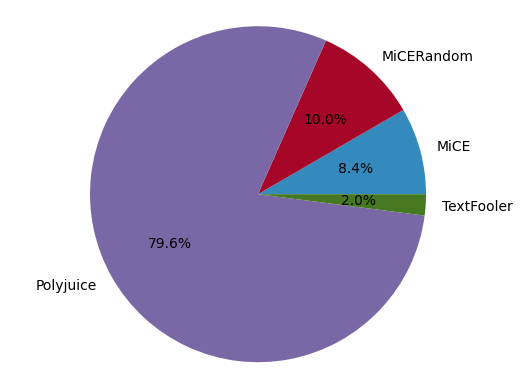

In [34]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['MiCE', 'MiCERandom', 'Polyjuice', 'TextFooler']
total = sum([105.99672277777778, 126.91551805555555, 1009.0409050000001, 25.8])
sizes = [(105.99672277777778/total)*100, (126.91551805555555/total)*100, (1009.0409050000001/total)*100, (25.8/total)*100]
  # Percentages representing the sizes of each slice

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Set aspect ratio to make the pie circular
plt.axis('equal')

# Display the chart
plt.show()

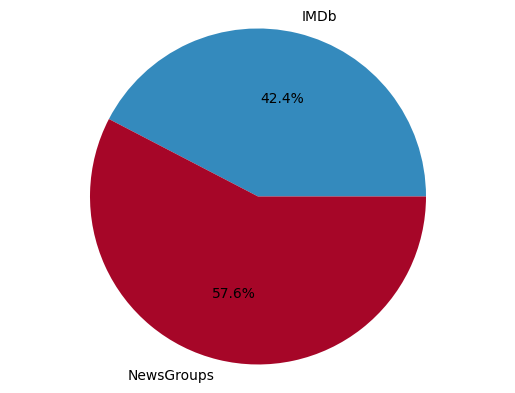

In [35]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['IMDb', 'NewsGroups']
total = sum([imdb_beam, news_beam])
sizes = [(imdb_beam/total)*100, (news_beam/total)*100]
  # Percentages representing the sizes of each slice

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Set aspect ratio to make the pie circular
plt.axis('equal')

# Display the chart
plt.show()

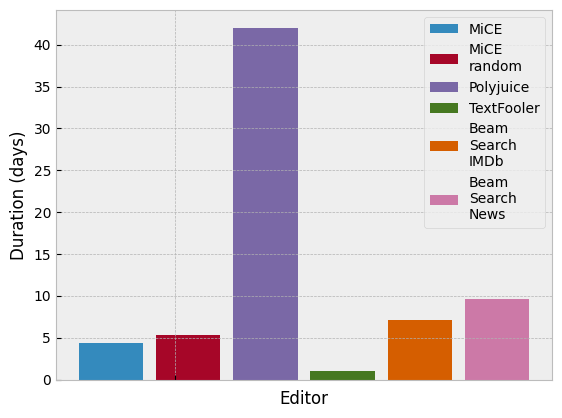

In [36]:
import numpy as np
import matplotlib.pyplot as plt

N = 1
ind = np.arange(N)
width = 0.5

xvals = [mice/24]
bar1 = plt.bar(ind, xvals, width)

yvals = [mice_random/24]  
bar2 = plt.bar(ind+width+0.1, yvals, width)

zvals = [polyjuice/24]
bar3 = plt.bar(ind+2*width+0.2, zvals, width)

kvals = [textfooler/24]
bar4 = plt.bar(ind+3*width+0.3, kvals, width)

jvals = [imdb_beam/24]
bar5 = plt.bar(ind+4*width+0.4, jvals, width)

lvals = [news_beam/24]
bar6 = plt.bar(ind+5*width+0.5, lvals, width)

plt.xlabel('Editor')
plt.ylabel('Duration (days)')

plt.xticks(ind+width, (''))
plt.legend( (bar1, bar2, bar3, bar4, bar5, bar6), ('MiCE', 'MiCE\nrandom', 'Polyjuice', "TextFooler", "Beam\nSearch\nIMDb", "Beam\nSearch\nNews"), fontsize='medium' )
plt.show()

In [37]:
(mice+polyjuice+textfooler+imdb_beam+news_beam+mice_random)/24

69.55687151620371

In [38]:
20.87*3600/10/800

9.3915

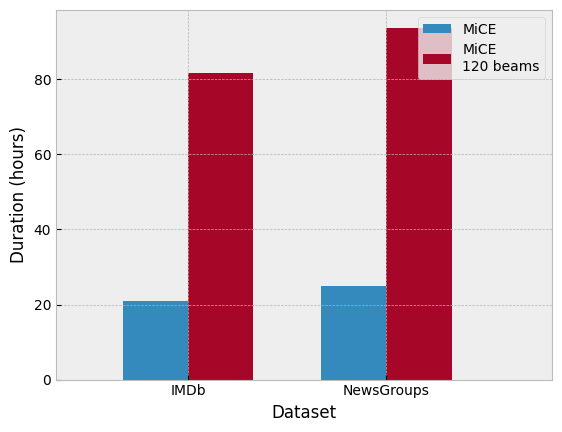

In [39]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
ind = np.arange(N)
width = 0.33

xvals = [(50*430 + 15*400*9)/3600, 24.79857611111111]
bar1 = plt.bar(ind, xvals, width)

yvals = [81.56818916666667, 93.7654922222222]  
bar2 = plt.bar(ind+width, yvals, width)

plt.xlim(-0.5, 2)
plt.xlabel('Dataset')
plt.ylabel('Duration (hours)')

plt.xticks(ind+width/2, ('IMDb', 'NewsGroups'))
plt.legend( (bar1, bar2), ('MiCE', 'MiCE\n120 beams'), fontsize='medium' )
plt.show()

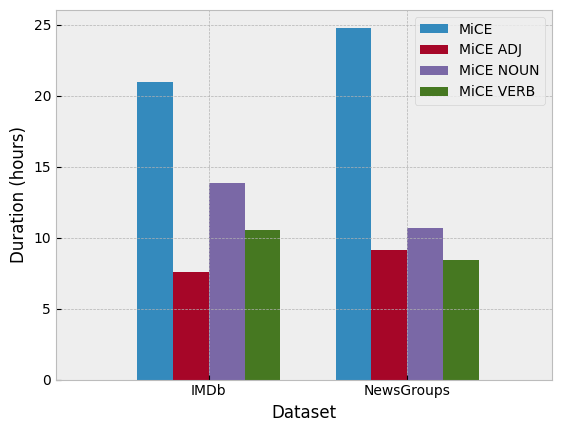

In [40]:
import numpy as np
import matplotlib.pyplot as plt

N = 2
ind = np.arange(N)
width = 0.18

xvals = [(50*430 + 15*400*9)/3600, 24.79857611111111]
bar1 = plt.bar(ind, xvals, width)

yvals = [(26*430 + 200*10*8)/3600, 9.159918055555554]  
bar2 = plt.bar(ind+width, yvals, width)

zvals = [(53*430 + 15*9*200)/3600, 10.707870277777777]
bar3 = plt.bar(ind+2*width, zvals, width)

hvals = [(40*430 + 11.5*200*9)/3600, 8.449802777777778]
bar4 = plt.bar(ind+3*width, hvals, width)

plt.xlim(-0.5, 2)
plt.xlabel('Dataset')
plt.ylabel('Duration (hours)')

plt.xticks(ind+width*1.5, ('IMDb', 'NewsGroups'))
plt.legend( (bar1, bar2, bar3, bar4), ('MiCE', 'MiCE ADJ', 'MiCE NOUN', 'MiCE VERB'), fontsize='medium' )
plt.show()